In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import statistics
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('D:\Projects\car_prices.csv')

In [105]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


In [106]:
print(df)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission state  condition  odometer   color interior  \
0         automatic    ca        5.0   16639.0   white    black   
1         automatic    ca        5.0 

In [107]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


In [108]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [109]:
df.shape

(558837, 14)

In [110]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   state         558837 non-null  object 
 7   condition     547017 non-null  float64
 8   odometer      558743 non-null  float64
 9   color         558088 non-null  object 
 10  interior      558088 non-null  object 
 11  seller        558837 non-null  object 
 12  mmr           558799 non-null  float64
 13  sellingprice  558825 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 59.7+ MB


In [112]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
dtype: int64

In [113]:
df.duplicated().sum()

0

In [114]:
# Check for null values in all columns
null_values_columns = df.isnull().any()

# Print columns with null values
print("Columns with null values:")
for column, has_null in null_values_columns.items():
    if has_null:
        print(column)


Columns with null values:
make
model
trim
body
transmission
condition
odometer
color
interior
mmr
sellingprice


In [115]:
# Check for null values in all columns
null_values_columns = df.isnull().sum()

# Print columns with null values and their respective count of null values
print("Columns with null values and their counts:")
for column, null_count in null_values_columns.items():
    if null_count > 0:
        print(f"{column}: {null_count}")

Columns with null values and their counts:
make: 10301
model: 10399
trim: 10651
body: 13195
transmission: 65352
condition: 11820
odometer: 94
color: 749
interior: 749
mmr: 38
sellingprice: 12


In [116]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['make', 'model', 'trim', 'body', 'transmission', 'state', 'color',
       'interior', 'seller'],
      dtype='object')


In [117]:
# Calculate frequencies of each category
frequency_map_model = df['model'].value_counts(normalize=True)

# Map frequencies to the original categories
df['frequency_encoded_model'] = df['model'].map(frequency_map_model)

print(df['frequency_encoded_model'])

0         0.006214
1         0.006214
2         0.014959
3         0.002102
4         0.000197
            ...   
558832    0.000111
558833    0.001701
558834    0.004489
558835    0.035280
558836    0.026400
Name: frequency_encoded_model, Length: 558837, dtype: float64


In [118]:
# Calculate frequencies of each category
frequency_map_model = df['trim'].value_counts(normalize=True)

# Map frequencies to the original categories
df['frequency_encoded_trim'] = df['trim'].map(frequency_map_model)

print(df['frequency_encoded_trim'])

0         0.037865
1         0.037865
2         0.000055
3         0.001624
4         0.000841
            ...   
558832    0.004247
558833    0.000002
558834    0.000567
558835    0.020453
558836    0.030539
Name: frequency_encoded_trim, Length: 558837, dtype: float64


In [119]:
# Calculate frequencies of each category
frequency_map_model = df['body'].value_counts(normalize=True)

# Map frequencies to the original categories
df['frequency_encoded_body'] = df['body'].map(frequency_map_model)

print(df['frequency_encoded_body'])

0         0.218627
1         0.218627
2         0.365509
3         0.365509
4         0.365509
            ...   
558832    0.365509
558833    0.024338
558834    0.218627
558835    0.076801
558836    0.013604
Name: frequency_encoded_body, Length: 558837, dtype: float64


In [120]:
# Calculate frequencies of each category
frequency_map_model = df['state'].value_counts(normalize=True)

# Map frequencies to the original categories
df['frequency_encoded_state'] = df['state'].map(frequency_map_model)

print(df['frequency_encoded_state'])

0         0.130893
1         0.130893
2         0.130893
3         0.130893
4         0.130893
            ...   
558832    0.007739
558833    0.013270
558834    0.130893
558835    0.062183
558836    0.130893
Name: frequency_encoded_state, Length: 558837, dtype: float64


In [121]:
# Calculate frequencies of each category
frequency_map_model = df['color'].value_counts(normalize=True)

# Map frequencies to the original categories
df['frequency_encoded_color'] = df['color'].map(frequency_map_model)

print(df['frequency_encoded_color'])

0         0.191140
1         0.191140
2         0.148466
3         0.191140
4         0.148466
            ...   
558832    0.149419
558833    0.191140
558834    0.198840
558835    0.191140
558836    0.148466
Name: frequency_encoded_color, Length: 558837, dtype: float64


In [122]:
# Calculate frequencies of each category
frequency_map_model = df['seller'].value_counts(normalize=True)

# Map frequencies to the original categories
df['frequency_encoded_seller'] = df['seller'].map(frequency_map_model)

print(df['frequency_encoded_seller'])

0         0.007968
1         0.007968
2         0.010753
3         0.000893
4         0.010753
            ...   
558832    0.022439
558833    0.000002
558834    0.010753
558835    0.005383
558836    0.007646
Name: frequency_encoded_seller, Length: 558837, dtype: float64


In [123]:
# Calculate frequencies of each category
frequency_map_model = df['interior'].value_counts(normalize=True)

# Map frequencies to the original categories
df['frequency_encoded_interior'] = df['interior'].map(frequency_map_model)

print(df['frequency_encoded_interior'])

0         0.437797
1         0.107076
2         0.437797
3         0.437797
4         0.437797
            ...   
558832    0.437797
558833    0.437797
558834    0.437797
558835    0.437797
558836    0.319987
Name: frequency_encoded_interior, Length: 558837, dtype: float64


In [124]:
# Calculate frequencies of each category
frequency_map_model = df['make'].value_counts(normalize=True)

# Map frequencies to the original categories
df['frequency_encoded_make'] = df['make'].map(frequency_map_model)

print(df['frequency_encoded_make'])

0         0.032955
1         0.032955
2         0.037771
3         0.006906
4         0.037771
            ...   
558832    0.032955
558833    0.008339
558834    0.037771
558835    0.098345
558836    0.170552
Name: frequency_encoded_make, Length: 558837, dtype: float64


In [125]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,...,mmr,sellingprice,frequency_encoded_model,frequency_encoded_trim,frequency_encoded_body,frequency_encoded_state,frequency_encoded_color,frequency_encoded_seller,frequency_encoded_interior,frequency_encoded_make
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,...,20500.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.437797,0.032955
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,...,20800.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.107076,0.032955
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,...,31900.0,30000.0,0.014959,0.000055,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,...,27500.0,27750.0,0.002102,0.001624,0.365509,0.130893,0.191140,0.000893,0.437797,0.006906
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,...,66000.0,67000.0,0.000197,0.000841,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,in,45.0,18255.0,silver,...,35300.0,33000.0,0.000111,0.004247,0.365509,0.007739,0.149419,0.022439,0.437797,0.032955
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,...,30200.0,30800.0,0.001701,0.000002,0.024338,0.013270,0.191140,0.000002,0.437797,0.008339
558834,2012,BMW,X5,xDrive35d,SUV,automatic,ca,48.0,50561.0,black,...,29800.0,34000.0,0.004489,0.000567,0.218627,0.130893,0.198840,0.010753,0.437797,0.037771
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,ga,38.0,16658.0,white,...,15100.0,11100.0,0.035280,0.020453,0.076801,0.062183,0.191140,0.005383,0.437797,0.098345


In [126]:
# Drop the specified columns
df.drop(columns='model', inplace=True)
df.drop(columns='trim', inplace=True)
df.drop(columns='state', inplace=True)
df.drop(columns='body', inplace=True)
df.drop(columns='condition', inplace=True)
df.drop(columns='color', inplace=True)
df.drop(columns='interior', inplace=True)
df.drop(columns='make', inplace=True)
df.drop(columns='seller', inplace=True)

In [127]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['transmission'], prefix='transmission')

# Concatenate one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

print(df_encoded)

        year transmission  odometer      mmr  sellingprice  \
0       2015    automatic   16639.0  20500.0       21500.0   
1       2015    automatic    9393.0  20800.0       21500.0   
2       2014    automatic    1331.0  31900.0       30000.0   
3       2015    automatic   14282.0  27500.0       27750.0   
4       2014    automatic    2641.0  66000.0       67000.0   
...      ...          ...       ...      ...           ...   
558832  2015          NaN   18255.0  35300.0       33000.0   
558833  2012    automatic   54393.0  30200.0       30800.0   
558834  2012    automatic   50561.0  29800.0       34000.0   
558835  2015    automatic   16658.0  15100.0       11100.0   
558836  2014    automatic   15008.0  29600.0       26700.0   

        frequency_encoded_model  frequency_encoded_trim  \
0                      0.006214                0.037865   
1                      0.006214                0.037865   
2                      0.014959                0.000055   
3                  

In [130]:
df_encoded.head()

,year,transmission,odometer,mmr,sellingprice,frequency_encoded_model,frequency_encoded_trim,frequency_encoded_body,frequency_encoded_state,frequency_encoded_color,frequency_encoded_seller,frequency_encoded_interior,frequency_encoded_make,transmission_Sedan,transmission_automatic,transmission_manual
0,2015,automatic,16639.0,20500.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.437797,0.032955,0,1,0
1,2015,automatic,9393.0,20800.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.107076,0.032955,0,1,0
2,2014,automatic,1331.0,31900.0,30000.0,0.014959,0.000055,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771,0,1,0
3,2015,automatic,14282.0,27500.0,27750.0,0.002102,0.001624,0.365509,0.130893,0.191140,0.000893,0.437797,0.006906,0,1,0
4,2014,automatic,2641.0,66000.0,67000.0,0.000197,0.000841,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771,0,1,0


In [131]:
df_new = df_encoded

In [132]:
df_new.drop(columns='transmission', inplace=True)

In [133]:
df_new.head()

,year,odometer,mmr,sellingprice,frequency_encoded_model,frequency_encoded_trim,frequency_encoded_body,frequency_encoded_state,frequency_encoded_color,frequency_encoded_seller,frequency_encoded_interior,frequency_encoded_make,transmission_Sedan,transmission_automatic,transmission_manual
0,2015,16639.0,20500.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.437797,0.032955,0,1,0
1,2015,9393.0,20800.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.107076,0.032955,0,1,0
2,2014,1331.0,31900.0,30000.0,0.014959,0.000055,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771,0,1,0
3,2015,14282.0,27500.0,27750.0,0.002102,0.001624,0.365509,0.130893,0.191140,0.000893,0.437797,0.006906,0,1,0
4,2014,2641.0,66000.0,67000.0,0.000197,0.000841,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771,0,1,0


In [135]:
# Define a function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return (z_scores > threshold).any()

# Check for outliers in each column
columns_with_outliers_zscore = df_new.apply(detect_outliers_zscore)

# Print columns with outliers using z-score method
print("Columns with outliers (z-score):")
print(columns_with_outliers_zscore)

Columns with outliers (z-score):
year                           True
odometer                       True
mmr                            True
sellingprice                   True
frequency_encoded_model        True
frequency_encoded_trim        False
frequency_encoded_body        False
frequency_encoded_state       False
frequency_encoded_color       False
frequency_encoded_seller      False
frequency_encoded_interior    False
frequency_encoded_make        False
transmission_Sedan             True
transmission_automatic        False
transmission_manual            True
dtype: bool


In [137]:
# Define a function for Winsorization
def winsorize_series(series, lower_pct=0.05, upper_pct=0.95):
    lower_bound = series.quantile(lower_pct)
    upper_bound = series.quantile(upper_pct)
    series_winsorized = series.clip(lower=lower_bound, upper=upper_bound)
    return series_winsorized

# Apply Winsorization to specific columns (e.g., math_score, reading_score, writing_score)
df_new['year'] = winsorize_series(df_new['year'])
df_new['odometer'] = winsorize_series(df_new['odometer'])
df_new['mmr'] = winsorize_series(df_new['mmr'])
df_new['sellingprice'] = winsorize_series(df_new['sellingprice'])
df_new['frequency_encoded_model'] = winsorize_series(df_new['frequency_encoded_model'])

In [139]:
# Define a function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return (z_scores > threshold).any()

# Check for outliers in each column
columns_with_outliers_zscore = df_new.apply(detect_outliers_zscore)

# Print columns with outliers using z-score method
print("Columns with outliers (z-score):")
print(columns_with_outliers_zscore)

Columns with outliers (z-score):
year                          False
odometer                      False
mmr                           False
sellingprice                  False
frequency_encoded_model       False
frequency_encoded_trim        False
frequency_encoded_body        False
frequency_encoded_state       False
frequency_encoded_color       False
frequency_encoded_seller      False
frequency_encoded_interior    False
frequency_encoded_make        False
transmission_Sedan             True
transmission_automatic        False
transmission_manual            True
dtype: bool


In [140]:
df_new.head()

,year,odometer,mmr,sellingprice,frequency_encoded_model,frequency_encoded_trim,frequency_encoded_body,frequency_encoded_state,frequency_encoded_color,frequency_encoded_seller,frequency_encoded_interior,frequency_encoded_make,transmission_Sedan,transmission_automatic,transmission_manual
0,2014.0,16639.0,20500.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.437797,0.032955,0,1,0
1,2014.0,10512.0,20800.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.107076,0.032955,0,1,0
2,2014.0,10512.0,30600.0,30000.0,0.014959,0.000055,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771,0,1,0
3,2014.0,14282.0,27500.0,27750.0,0.002102,0.001624,0.365509,0.130893,0.191140,0.000893,0.437797,0.006906,0,1,0
4,2014.0,10512.0,30600.0,30600.0,0.000385,0.000841,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771,0,1,0


In [144]:
# Check for null values in all columns
null_values_columns = df_new.isnull().sum()

# Print columns with null values and their respective count of null values
print("Columns with null values and their counts:")
for column, null_count in null_values_columns.items():
    if null_count > 0:
        print(f"{column}: {null_count}")

Columns with null values and their counts:
frequency_encoded_model: 10399
frequency_encoded_trim: 10651
frequency_encoded_body: 13195
frequency_encoded_color: 749
frequency_encoded_interior: 749
frequency_encoded_make: 10301


In [145]:
df_new['frequency_encoded_model'].fillna(df_new['frequency_encoded_model'].mean(), inplace=True)
df_new['frequency_encoded_trim'].fillna(df_new['frequency_encoded_trim'].median(), inplace=True)
df_new['frequency_encoded_body'].fillna(df_new['frequency_encoded_body'].median(), inplace=True)
df_new['frequency_encoded_color'].fillna(df_new['frequency_encoded_color'].mean(), inplace=True)
df_new['frequency_encoded_interior'].fillna(df_new['frequency_encoded_interior'].median(), inplace=True)
df_new['frequency_encoded_make'].fillna(df_new['frequency_encoded_make'].mean(), inplace=True)

In [146]:
# Check for null values in all columns
null_values_columns = df_new.isnull().sum()

# Print columns with null values and their respective count of null values
print("Columns with null values and their counts:")
for column, null_count in null_values_columns.items():
    if null_count > 0:
        print(f"{column}: {null_count}")

Columns with null values and their counts:


In [142]:
# Define a function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return (z_scores > threshold).any()

# Check for outliers in each column
columns_with_outliers_zscore = df_new.apply(detect_outliers_zscore)

# Print columns with outliers using z-score method
print("Columns with outliers (z-score):")
print(columns_with_outliers_zscore)

Columns with outliers (z-score):
year                          False
odometer                      False
mmr                           False
sellingprice                  False
frequency_encoded_model       False
frequency_encoded_trim        False
frequency_encoded_body        False
frequency_encoded_state       False
frequency_encoded_color       False
frequency_encoded_seller      False
frequency_encoded_interior    False
frequency_encoded_make        False
transmission_Sedan             True
transmission_automatic        False
transmission_manual            True
dtype: bool


In [147]:
df_new.head()

,year,odometer,mmr,sellingprice,frequency_encoded_model,frequency_encoded_trim,frequency_encoded_body,frequency_encoded_state,frequency_encoded_color,frequency_encoded_seller,frequency_encoded_interior,frequency_encoded_make,transmission_Sedan,transmission_automatic,transmission_manual
0,2014.0,16639.0,20500.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.437797,0.032955,0,1,0
1,2014.0,10512.0,20800.0,21500.0,0.006214,0.037865,0.218627,0.130893,0.191140,0.007968,0.107076,0.032955,0,1,0
2,2014.0,10512.0,30600.0,30000.0,0.014959,0.000055,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771,0,1,0
3,2014.0,14282.0,27500.0,27750.0,0.002102,0.001624,0.365509,0.130893,0.191140,0.000893,0.437797,0.006906,0,1,0
4,2014.0,10512.0,30600.0,30600.0,0.000385,0.000841,0.365509,0.130893,0.148466,0.010753,0.437797,0.037771,0,1,0


In [148]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   year                        558837 non-null  float64
 1   odometer                    558837 non-null  float64
 2   mmr                         558837 non-null  float64
 3   sellingprice                558837 non-null  float64
 4   frequency_encoded_model     558837 non-null  float64
 5   frequency_encoded_trim      558837 non-null  float64
 6   frequency_encoded_body      558837 non-null  float64
 7   frequency_encoded_state     558837 non-null  float64
 8   frequency_encoded_color     558837 non-null  float64
 9   frequency_encoded_seller    558837 non-null  float64
 10  frequency_encoded_interior  558837 non-null  float64
 11  frequency_encoded_make      558837 non-null  float64
 12  transmission_Sedan          558837 non-null  uint8  
 13  transmission_a

In [151]:
df_new['year'] = pd.to_datetime(df_new['year'])

# Extract year from the datetime column and create a new column with just the year
df_new['year'] = df_new['year'].dt.year

In [152]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   year                        558837 non-null  int64  
 1   odometer                    558837 non-null  float64
 2   mmr                         558837 non-null  float64
 3   sellingprice                558837 non-null  float64
 4   frequency_encoded_model     558837 non-null  float64
 5   frequency_encoded_trim      558837 non-null  float64
 6   frequency_encoded_body      558837 non-null  float64
 7   frequency_encoded_state     558837 non-null  float64
 8   frequency_encoded_color     558837 non-null  float64
 9   frequency_encoded_seller    558837 non-null  float64
 10  frequency_encoded_interior  558837 non-null  float64
 11  frequency_encoded_make      558837 non-null  float64
 12  transmission_Sedan          558837 non-null  uint8  
 13  transmission_a

In [153]:
# # Separate the features and target variable
X = df_new.drop('sellingprice', axis=1)  
y = df_new['sellingprice']

In [154]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
# Define columns to scale
columns_to_scale = ['odometer', 'mmr']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data
scaler.fit(X_train[columns_to_scale])

# Transform both training and testing data
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [156]:
# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Assuming your target variable is 'Rent', extract its correlations with other features
rent_correlations = correlation_matrix['sellingprice'].drop('sellingprice')  # Drop 'Rent' since we're interested in its correlations with other features

# Sort the correlations in descending order
sorted_correlations = rent_correlations.abs().sort_values(ascending=False)

# Print the top correlated features
print("Top correlated features with Rent:")
print(sorted_correlations)


Top correlated features with Rent:
mmr                           0.981499
odometer                      0.673186
frequency_encoded_body        0.138340
frequency_encoded_seller      0.112742
frequency_encoded_color       0.111867
frequency_encoded_interior    0.107868
frequency_encoded_trim        0.072803
frequency_encoded_state       0.065987
transmission_manual           0.054038
frequency_encoded_model       0.021295
transmission_automatic        0.017326
frequency_encoded_make        0.012482
transmission_Sedan            0.000428
year                               NaN
Name: sellingprice, dtype: float64


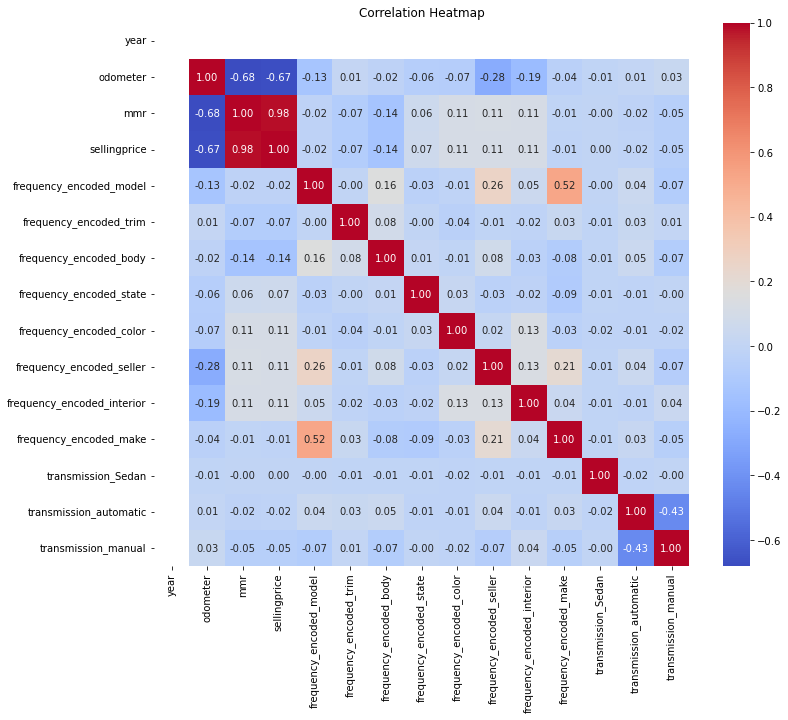

In [157]:
# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


In [158]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



# Initialize the linear regression model
estimator = LinearRegression()

# Initialize RFE with the linear regression model and the desired number of features to select
num_features_to_select = 10  # Change this value based on your preference
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected features:")
print(selected_features)


Selected features:
Index(['mmr', 'frequency_encoded_model', 'frequency_encoded_body',
       'frequency_encoded_state', 'frequency_encoded_color',
       'frequency_encoded_seller', 'frequency_encoded_interior',
       'frequency_encoded_make', 'transmission_Sedan', 'transmission_manual'],
      dtype='object')


In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

start_time = time.time()

# Assuming selected_features contains the list of selected feature names
# Initialize the linear regression model
model = LinearRegression()

# Train the model using only the selected features
X_train_selected = X_train[selected_features]
model.fit(X_train_selected, y_train)

# Predict on the testing data using the selected features
X_test_selected = X_test[selected_features]
y_pred = model.predict(X_test_selected)


end_time = time.time()
total_time = end_time - start_time


# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("\nTotal time taken:", total_time, "seconds")

Mean Squared Error: 2353913.1218739524

Total time taken: 0.11677074432373047 seconds


In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained your model and obtained predictions
# model.predict(X_test) should return the predicted rent values

# Predictions from the model
y_pred = model.predict(X_test_selected)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 2353913.1218739524
Mean Absolute Error (MAE): 984.3500839895437
R-squared (R²) Score: 0.9638980041926293
Root Mean Squared Error (RMSE): 1534.2467604247865
